In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import lzma, pickle
import scipy

load_dir = '../data_frames/'
save_dir = "./figures/plots/"
save_fig = 0 #Change to 1 when you want to save figures
fig_ext = '.pdf'

# Analysis at convergence, fixing ($d$, $\rho$, $\lambda$) and varying $\delta$

---

In [2]:
graph=r"rrg"
d=3
N=10000
init=r"rnd"

g_s = r"graph_type"
d_s = r"$d$"
N_s = r"$N$"
i_s = r"init"

r_s = r"$\rho$"
l_s = r"$\lambda$"
del_s = r"$\delta$"

In [3]:
file_name = "DF_PhDiag.xz"
with lzma.open(load_dir + file_name, "rb") as f:
    data_frame = pickle.load(f)

mo0t_s = r"$\widetilde{MO}_{t=0}$"
Rmse_s = r"$R_{MSE}$"

In [4]:
data_frame = data_frame[(data_frame["o_type"]=="rho") & (data_frame["s_type"]=="delta")]
data_frame[r_s] = data_frame["M"]
data_frame[del_s] = data_frame["S"]

In [5]:
data_frame.iloc[:, :18]

,init,graph_type,$N$,$d$,$\lambda$,s_type,S,o_type,M,iter_space,seed,tol,n_iter,obs_type,snap_time,T_max,mask_type,tol2
0,rnd,rrg,10000,3,0.7,delta,0.01,rho,0.25,100,13,1.000000e-09,2000,sensors,-1,100,dSIR_one,0.01
1,inf,rrg,10000,3,0.7,delta,0.01,rho,0.25,100,13,1.000000e-09,2000,sensors,-1,100,dSIR_one,0.01
2,rnd,rrg,10000,3,0.7,delta,0.02,rho,0.25,100,13,1.000000e-09,2000,sensors,-1,100,dSIR_one,0.01
3,inf,rrg,10000,3,0.7,delta,0.02,rho,0.25,100,13,1.000000e-09,2000,sensors,-1,100,dSIR_one,0.01
4,rnd,rrg,10000,3,0.7,delta,0.03,rho,0.25,100,13,1.000000e-09,2000,sensors,-1,100,dSIR_one,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,inf,rrg,10000,3,1.0,delta,0.08,rho,0.15,100,10,1.000000e-09,2000,sensors,-1,100,dSIR_one,0.01
15996,rnd,rrg,10000,3,1.0,delta,0.09,rho,0.15,100,10,1.000000e-09,2000,sensors,-1,100,dSIR_one,0.01
15997,inf,rrg,10000,3,1.0,delta,0.09,rho,0.15,100,10,1.000000e-09,2000,sensors,-1,100,dSIR_one,0.01
15998,rnd,rrg,10000,3,1.0,delta,0.10,rho,0.15,100,10,1.000000e-09,2000,sensors,-1,100,dSIR_one,0.01


In [6]:
omo0_s = r"$\overline{MO}_{t=0}$"
oRmse_s = r"$\overline{R_{MSE}}$"
data_frame[omo0_s] = (data_frame[mo0t_s] - data_frame[r_s])/(1- data_frame[r_s])
data_frame[oRmse_s] = (data_frame[Rmse_s] - data_frame[r_s])/(1- data_frame[r_s])

### Heatmap

In [7]:
df = data_frame[((data_frame[i_s]==init) & (data_frame[g_s]==graph) & (data_frame[d_s]==d) & (data_frame[N_s]==N))]

In [30]:
y_s=omo0_s

In [31]:
l_list = np.sort(df[l_s].unique())
r_list = np.sort(df[r_s].unique())
del_list = np.sort(df[del_s].unique())

len_l = len(l_list)
len_r = len(r_list)
len_del = len(del_list)

y_tab = np.zeros((len_l,len_r,len_del))
l_tab = np.zeros((len_l,len_r,len_del))
r_tab = np.zeros((len_l,len_r,len_del))
d_tab = np.zeros((len_l,len_r,len_del))

for i_l,lam in enumerate(l_list):
    for i_r,rho in enumerate(r_list):
        for i_d,delta in enumerate(del_list):
            y_tab[i_l][i_r][i_d] = df[ (df[l_s]==lam) & (df[r_s]==rho) & (df[del_s]==delta)][y_s].mean()
            l_tab[i_l][i_r][i_d] = lam
            r_tab[i_l][i_r][i_d] = rho
            d_tab[i_l][i_r][i_d] = delta
df_flat = pd.DataFrame({r_s:r_tab.flatten(),l_s:l_tab.flatten(),del_s:d_tab.flatten(),y_s:y_tab.flatten()})
df_lam_list = []
for lam in l_list:
    df_lam_list.append( df_flat[ (df_flat[l_s]==lam)].drop(l_s,axis=1) )

In [32]:
df_lam_list[2].pivot(del_s,r_s,y_s)

$\rho$,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35
$\delta$,,,,,,,,
0.01,0.0,0.495431,0.876680,0.946278,0.960215,0.965863,0.967485,0.971897
0.02,0.0,0.202366,0.609386,0.827245,0.911918,0.941635,0.956865,0.963915
0.03,0.0,0.113248,0.408695,0.667690,0.809498,0.880820,0.916643,0.937973
0.04,0.0,0.062401,0.276813,0.510096,0.689087,0.802482,0.866818,0.903919
0.05,0.0,0.048143,0.205588,0.411209,0.590946,0.719510,0.808146,0.860529
0.06,0.0,0.035657,0.159607,0.334372,0.497721,0.636524,0.735385,0.804999
0.07,0.0,0.031840,0.131285,0.281478,0.432583,0.566327,0.671291,0.743184
0.08,0.0,0.021051,0.100167,0.223583,0.356977,0.489354,0.600659,0.691264
0.09,0.0,0.018230,0.088374,0.192980,0.316283,0.438437,0.553927,0.637564


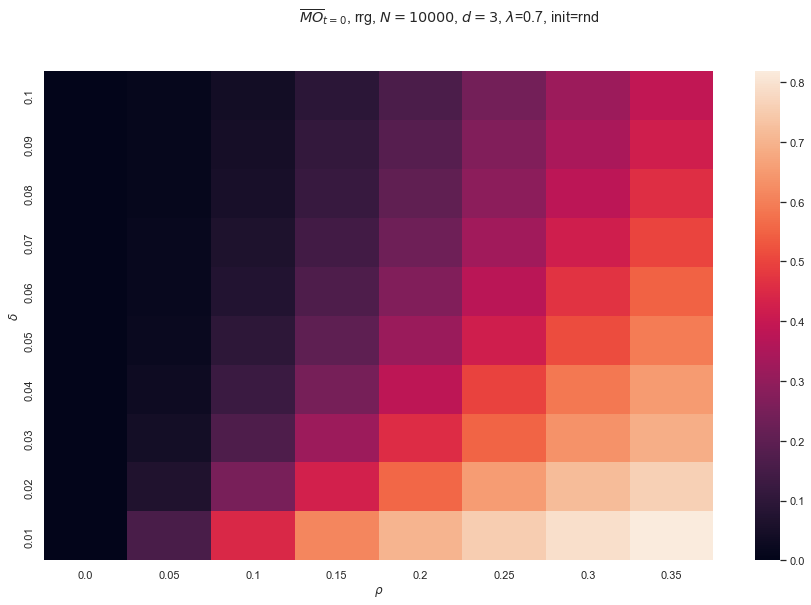

In [33]:
sns.set_theme(font_scale=1)
fig,ax = plt.subplots(figsize=(15,9))
rnd = np.random.choice(range(len(l_list)))
i=rnd
plt.suptitle(y_s + f", {graph}, $N={N}$, $d={d}$, " + l_s + f"={l_list[i]}, init={init}")
ax = sns.heatmap(df_lam_list[i].pivot(del_s,r_s,y_s))
ax.invert_yaxis()

#plt.tight_layout()
#fig.savefig(save_dir + f"NC_{graph}_N{N}_d{d}_LAM_RHO_ns5.pdf")

In [34]:
f_list = []
x_un_list = []
y_un_list = []
z_un_list = []
for i, df_lam in enumerate(df_lam_list):
    x = df_lam[r_s].values
    y = df_lam[del_s].values
    z = df_lam[y_s].values
    x_un_list.append(np.unique(x))
    y_un_list.append(np.unique(y))
    z_un_list.append(df_lam[y_s].values.reshape((len(np.unique(x)),-1)))
    f_list.append(scipy.interpolate.RectBivariateSpline(x_un_list[i], y_un_list[i], z_un_list[i]))

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_74925/3427715509.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf, cax=cbar_ax)


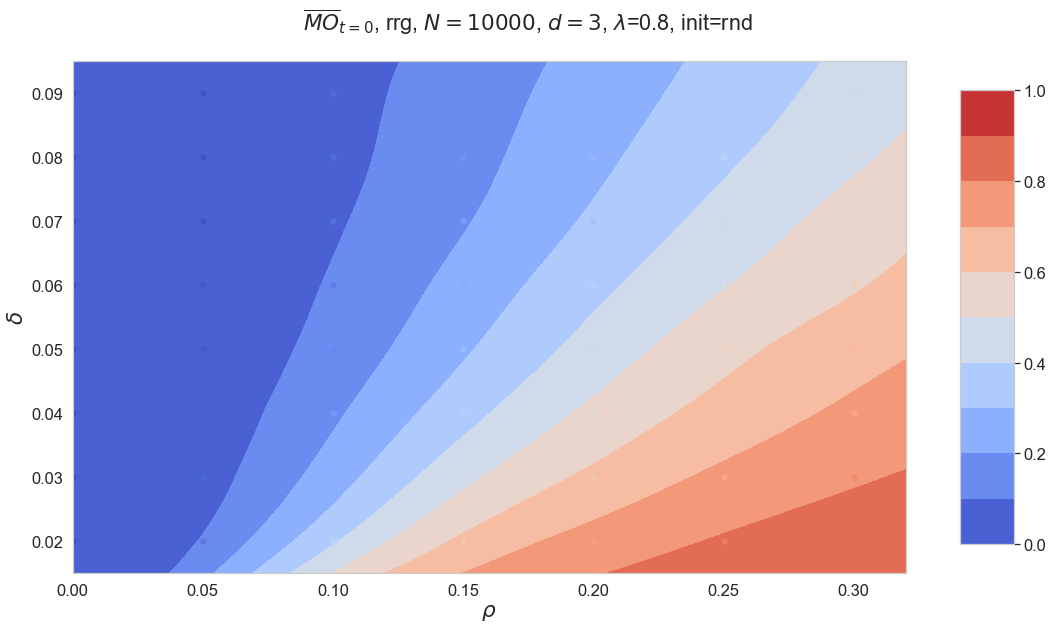

In [35]:
rnd = np.random.choice(range(len(l_list)))
i=rnd

sns.set_theme(style="whitegrid", font_scale=1.5)
fig,ax = plt.subplots(1,1, figsize=(15,9),)
plt.suptitle(y_s + f", {graph}, $N={N}$, $d={d}$, " + l_s + f"={l_list[i]}, init={init}")
levels=10
level_boundaries = np.linspace(0, 1, levels + 1)
# Make data.
X1 = np.arange(0, 0.35 + 0.001, 0.01)
Y1 = np.arange(0.01, 0.1 + 0.0001, 0.001)
X, Y = np.meshgrid(X1, Y1)
Z = np.array([ np.array([ max(min(f_list[i](x,y)[0][0],1),0) for x in X1]) for y in Y1])
# Plot the surface.
surf = ax.contourf(X, Y, Z, cmap=cm.coolwarm, levels=level_boundaries)

for i_x, x in enumerate(x_un_list[i]):
    for i_y, y in enumerate(y_un_list[i]):
        ax.scatter(x, y, s=40, color=cm.coolwarm(z_un_list[i][i_x][i_y]), edgecolors='grey', linewidths=0.)
        pass
ax.set_xlabel(r_s, fontsize='large')
ax.set_ylabel(del_s,  fontsize='large')
ax.set_xlim([0,0.32])
ax.set_ylim([0.015,0.095])
# Add a color bar which maps values to colors.
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
fig.colorbar(surf, cax=cbar_ax)

#fig.savefig(f"PhaseDiagRMSE_{graph}_N{N}_d{d}_RHO_DEL_lam.pdf")

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_74925/3634571011.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf, cax=cbar_ax)


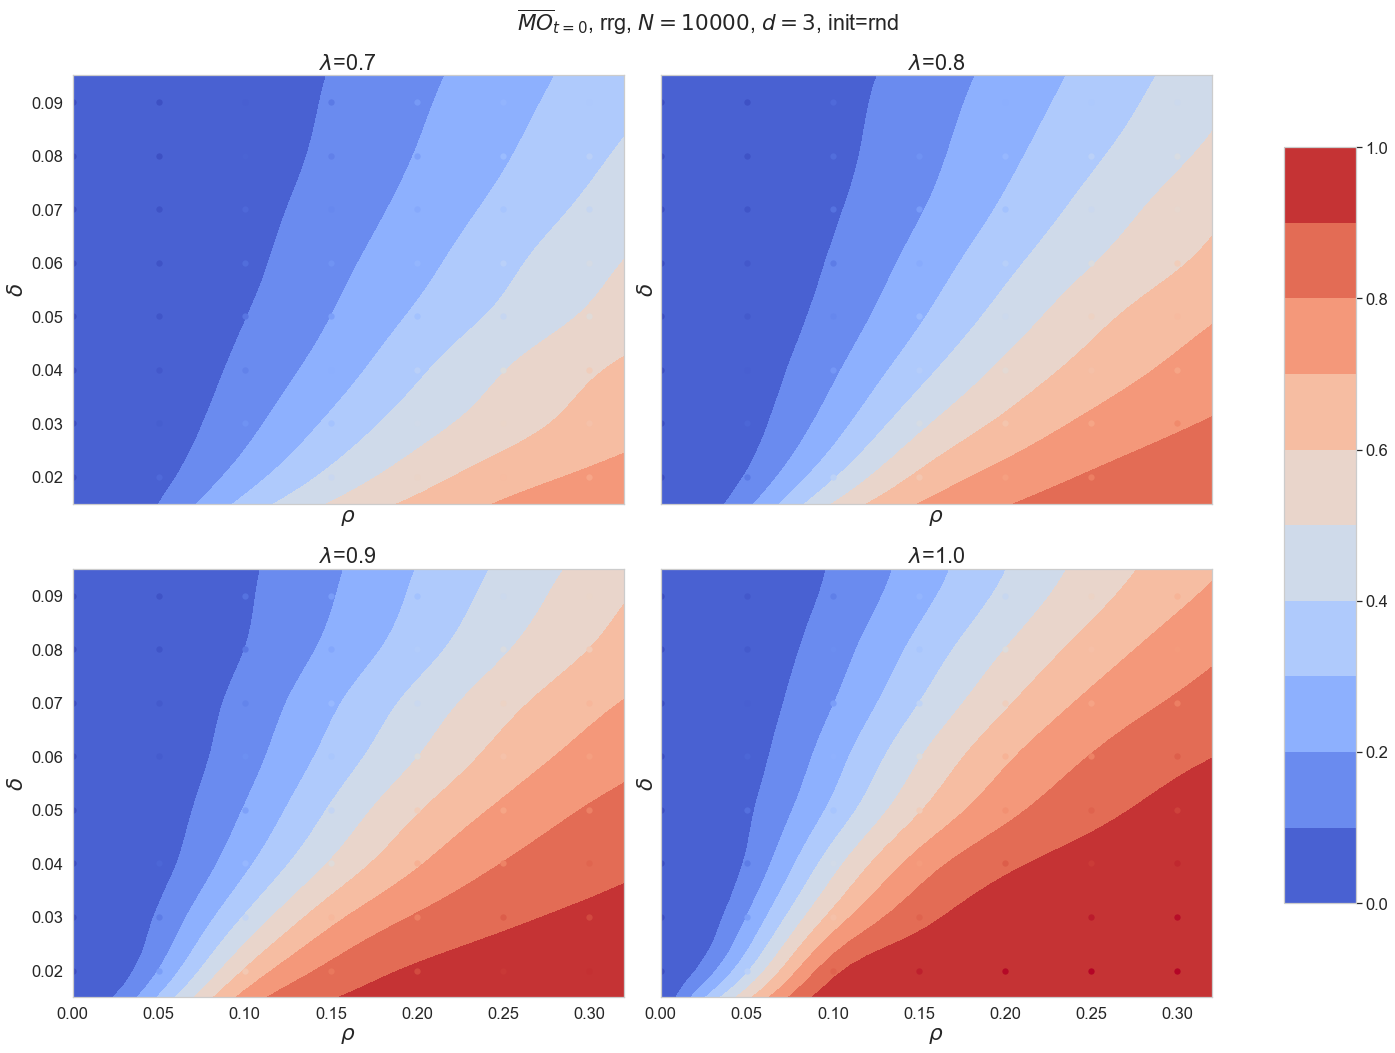

In [36]:
fig, axs = plt.subplots(2,2, figsize=(20,15), sharex=True, sharey=True)
plt.suptitle(y_s + f", {graph}, $N={N}$, $d={d}$, " + f"init={init}")
levels=10
level_boundaries = np.linspace(0, 1, levels + 1)
for i in range(len(l_list)):
    # Make data.
    X1 = np.arange(0, 0.35 + 0.001, 0.01)
    Y1 = np.arange(0.01, 0.1 + 0.0001, 0.001)
    X, Y = np.meshgrid(X1, Y1)
    Z = np.array([ np.array([ max(min(f_list[i](x,y)[0][0],1),0) for x in X1]) for y in Y1])
    # Plot the surface.

    surf = axs[int(i/2)][i%2].contourf(X, Y, Z, cmap=cm.coolwarm, levels=level_boundaries)
    
    for i_x, x in enumerate(x_un_list[i]):
        for i_y, y in enumerate(y_un_list[i]):
            axs[int(i/2)][i%2].scatter(x,y, s=40, color=cm.coolwarm(z_un_list[i][i_x][i_y]), edgecolors='grey', linewidths=0.)

    axs[int(i/2)][i%2].set_xlabel(r_s, fontsize='large')
    axs[int(i/2)][i%2].set_ylabel(del_s,  fontsize='large')
    axs[int(i/2)][i%2].set_title(l_s + f"={l_list[i]}",  fontsize='large')
    axs[int(i/2)][i%2].set_xlim([0,0.32])
    axs[int(i/2)][i%2].set_ylim([0.015,0.095])

# Add a color bar which maps values to colors.
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
fig.colorbar(surf, cax=cbar_ax)

#fig.savefig(f"PhaseDiagRMSE_{graph}_N{N}_d{d}_RHO_DEL_lam.pdf")